In [12]:
import torch
from torch import nn
import math
import torch.nn.functional as F

In [6]:
x = torch.rand(328, 32, 512)
d_model=512 #model dimension
n_head=8 # attention
#n_d dimenstion for each head
# ignore some positions

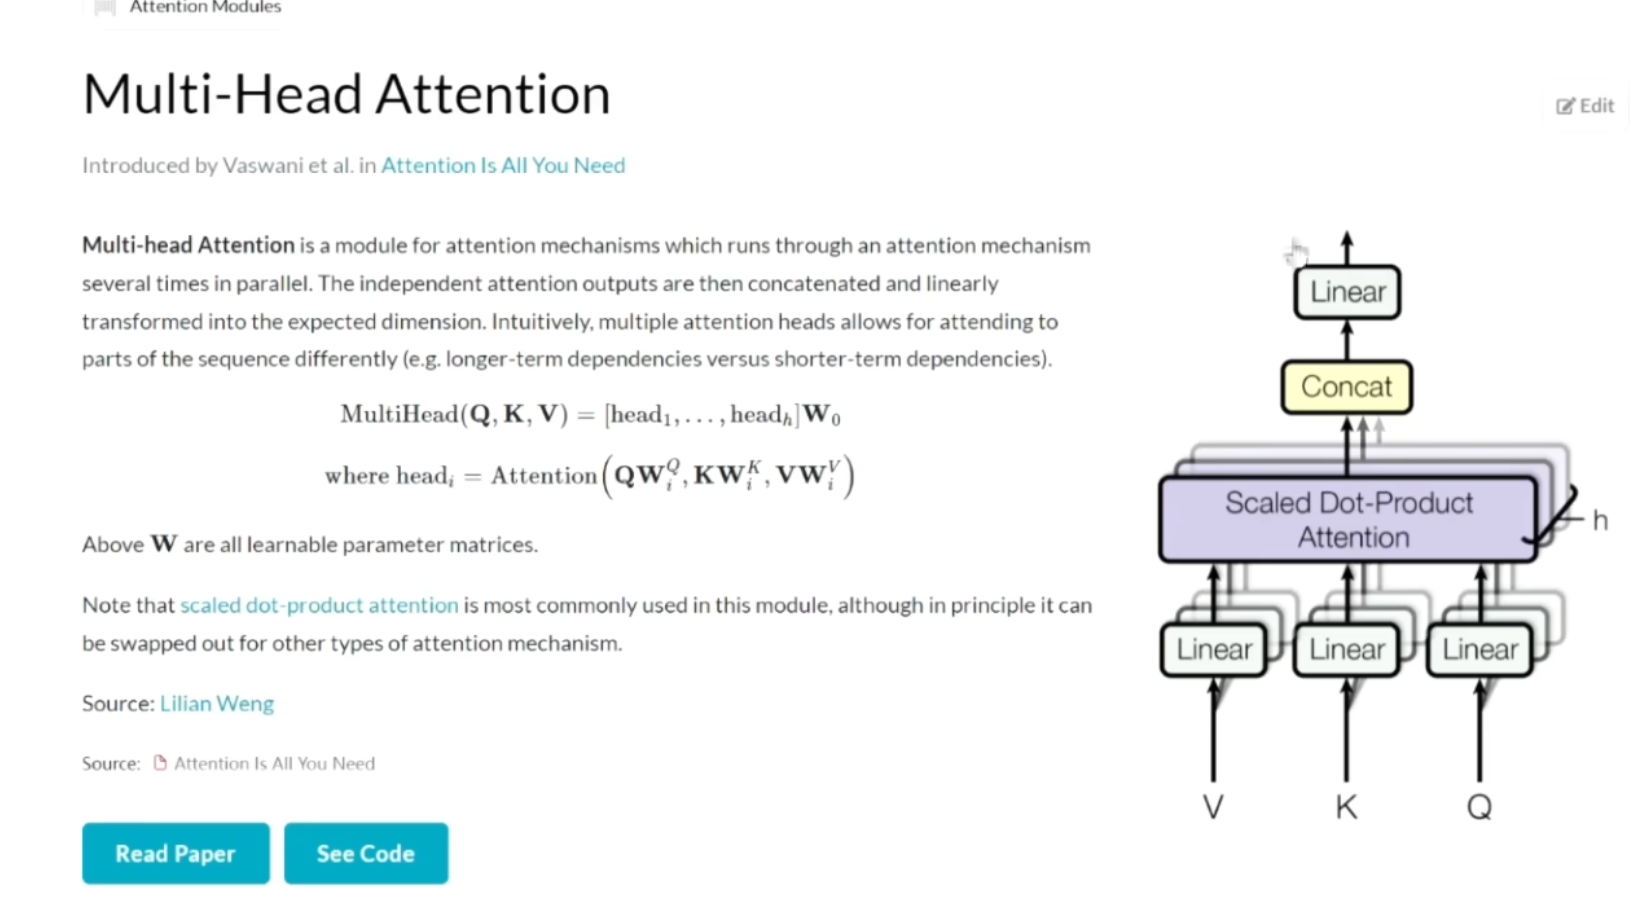

In [25]:
import torch
import torch.nn as nn
import math

# MultipleAttention
class MultipleAttention(nn.Module):
    def __init__(self, d_model, n_head):
        super(MultipleAttention, self).__init__()
        self.n_head = n_head
        self.d_model = d_model
        # Q、K、V Linear layer
        self.w_q = nn.Linear(d_model, d_model)
        self.w_k = nn.Linear(d_model, d_model)
        self.w_v = nn.Linear(d_model, d_model)
        # Linear layer after combining multiple head
        self.w_combine = nn.Linear(d_model, d_model)
        self.softmax = nn.Softmax(dim=-1)

    def forward(self, q, k, v, mask=None):
        batch, time, dimension = q.shape
        n_d = self.d_model // self.n_head  # 每个头的维度

        # Linear transformation
        q, k, v = self.w_q(q), self.w_k(k), self.w_v(v)

        # Taking apart q k v to multiple head ：(batch, time, d_model) -> (batch, n_head, time, n_d)
        q = q.view(batch, time, self.n_head, n_d).permute(0, 2, 1, 3)
        k = k.view(batch, time, self.n_head, n_d).permute(0, 2, 1, 3)
        v = v.view(batch, time, self.n_head, n_d).permute(0, 2, 1, 3)

        # attention score
        score = q @ k.transpose(2, 3) / math.sqrt(n_d)

        # mask
        if mask is not None:
            score = score.masked_fill(mask == 0, -10000)  # filling up negative inifinite

        # softmax * v
        score = self.softmax(score) @ v

        # combined multiple head：(batch, n_head, time, n_d) -> (batch, time, d_model)
        score = score.permute(0, 2, 1, 3).contiguous().view(batch, time, dimension)

        # linear transformation
        out = self.w_combine(score)
        return out


d_model = 512
n_head = 8
attention = MultipleAttention(d_model, n_head)

In [26]:
out = attention(x,x,x)
print(out)

tensor([[[ 0.0193,  0.0546, -0.0375,  ..., -0.2361,  0.0847, -0.0830],
         [ 0.0200,  0.0547, -0.0372,  ..., -0.2349,  0.0846, -0.0837],
         [ 0.0200,  0.0548, -0.0374,  ..., -0.2356,  0.0849, -0.0839],
         ...,
         [ 0.0204,  0.0553, -0.0376,  ..., -0.2343,  0.0844, -0.0836],
         [ 0.0204,  0.0549, -0.0379,  ..., -0.2357,  0.0850, -0.0829],
         [ 0.0199,  0.0543, -0.0371,  ..., -0.2355,  0.0846, -0.0826]],

        [[-0.0303,  0.0538, -0.0373,  ..., -0.2494,  0.0734, -0.1007],
         [-0.0303,  0.0547, -0.0365,  ..., -0.2483,  0.0737, -0.1008],
         [-0.0303,  0.0542, -0.0371,  ..., -0.2476,  0.0745, -0.1013],
         ...,
         [-0.0299,  0.0543, -0.0379,  ..., -0.2479,  0.0733, -0.1006],
         [-0.0305,  0.0542, -0.0371,  ..., -0.2484,  0.0742, -0.1021],
         [-0.0306,  0.0551, -0.0374,  ..., -0.2482,  0.0735, -0.1006]],

        [[-0.0392,  0.0764, -0.0684,  ..., -0.2708,  0.0507, -0.0839],
         [-0.0403,  0.0763, -0.0679,  ..., -0